In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_is_arraylike_not_scalar' from 'sklearn.utils.validation' (c:\Users\sophie.porton\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py)

In [16]:
#read in dataframes

x_train= pd.read_csv('x_train.csv')
x_test= pd.read_csv('x_test.csv')
y_train= pd.read_csv('y_train.csv')
y_test= pd.read_csv('y_test.csv')

x_train1=pd.read_csv('x_train1.csv')
x_test1=pd.read_csv('x_test1.csv')
y_train1=pd.read_csv('y_train1.csv')
y_test1=pd.read_csv('y_test1.csv')



In [17]:
training_score = []
testing_score = []

In [18]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.94075352315214
Accuracy_Score of LogisticRegression() model on Testing Data is: 76.94077055779184

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7518557794273595
Recall Score of LogisticRegression() model is: 0.8093607305936074
F1 Score of LogisticRegression() model is: 0.7795492028587135

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


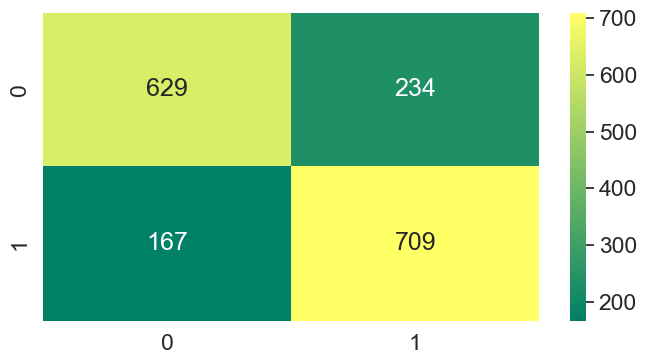

In [19]:
model_prediction(LogisticRegression())